### Example: Visualizing Seattle Bicycle Counts

• As a more involved example of working with some time series data, let’s take a look at bicycle counts on Seattle’s Fremont Bridge.

• This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.

• Once this dataset is downloaded, we can use Pandas to read the CSV output into a DataFrame.

• We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

• We can use Pandas to read the CSV output into a DataFrame.

• We will specify that we want the Date as an index, and we want these dates to be automatically parsed.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts.csv', index_col = 'Date', parse_dates = True)
#data = pd.read_csv('Fremont_Bridge_Hourly_Bicycle_Counts.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-04-30 23:00:00,8.0,16.0
2019-04-30 22:00:00,15.0,29.0
2019-04-30 21:00:00,17.0,54.0
2019-04-30 20:00:00,58.0,91.0
2019-04-30 19:00:00,106.0,175.0


• For convenience, we’ll further process this dataset by shortening the column names and adding a “Total” column:

In [24]:
data.columns = ['East', 'West']
data['total'] = data.eval('East + West')

• Now let’s take a look at the summary statistics for this data

In [25]:
data.dropna().describe()

,East,West,total
count,57615.000000,57615.000000,57615.000000
mean,51.916914,58.359889,110.276803
std,67.368033,84.958511,139.743003
min,0.000000,0.000000,0.000000
25%,6.000000,7.000000,14.000000
50%,28.000000,29.000000,60.000000
75%,69.000000,70.000000,143.000000
max,698.000000,717.000000,957.000000


### Visualizing the data

• We can gain some insight into the dataset by visualizing it.

• Let’s start by plotting the raw data

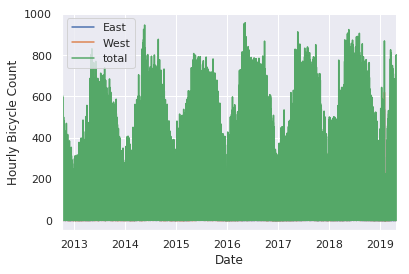

In [26]:
%matplotlib inline
sns.set()
data.plot()
plt.ylabel('Hourly Bicycle Count');

• The ~25,000 hourly samples are far too dense for us to make much sense of.

• We can gain more insight by resampling the data to a coarser grid.

• Let’s resample by week

Text(0, 0.5, 'Weekly Bicycle Count')

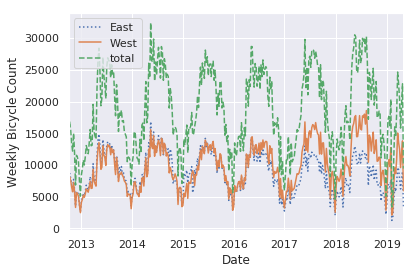

In [28]:
weekly = data.resample('W').sum()
weekly.plot(style = [':', '-', '--'])
plt.ylabel('Weekly Bicycle Count')

• This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.

• Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function.

• Here we’ll do a 30-day rolling mean of our data, making sure to center the window.

Text(0, 0.5, 'Mean Hourly Count')

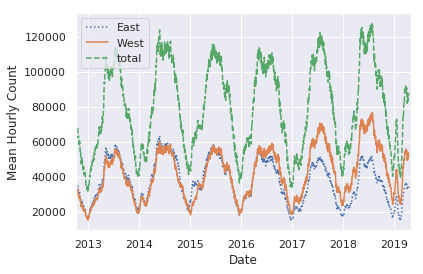

In [31]:
daily = data.resample('D').sum()
daily.rolling(30, center = True).sum().plot(style = [':', '-', '--'])
plt.ylabel('Mean Hourly Count')

• The jaggedness of the result is due to the hard cutoff of the window.

• We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.

• The following code (visualized in Figure 3-14) specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days).

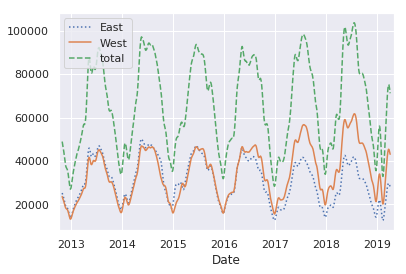

In [34]:
daily.rolling(50, center = True, win_type = 'gaussian').sum(std = 10).plot(style = [':', '-', '--']);

### Digging into the data

• While the smoothed data views in Figure 3-14 are useful to get an idea of the general trend in the data, they hide much of the interesting structure.

• For example, we might want to look at the average traffic as a function of the time of day.

• We can do this using the GroupBy functionality.

Text(0, 0.5, 'Average hourly bicycle counts')

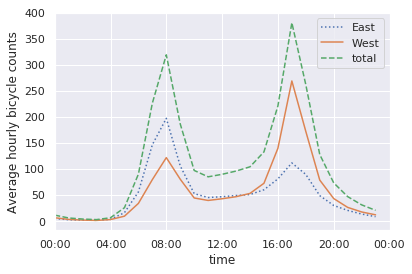

In [42]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(7)
by_time.plot(xticks = hourly_ticks, style = [':', '-', '--'])
plt.ylabel('Average hourly bicycle counts');

• We also might be curious about how things change based on the day of the week.

• Again, we can do this with a simple groupby.

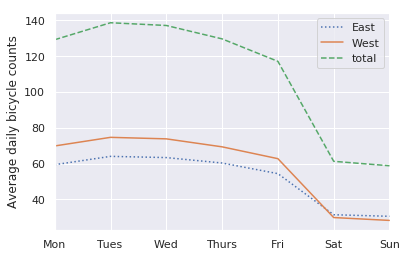

In [41]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style = [':', '-', '--'])
plt.ylabel('Average daily bicycle counts');

• This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

• With this in mind, let’s do a compound groupby and look at the hourly trend on weekdays versus weekends.

• We’ll start by grouping by both a flag marking the weekend, and the time of day.